In [40]:
# Import the actual code
from utils import extract_authors
from utils import clean_author_names
from utils import create_author_count_dataframe

In [41]:
# Import necessary libraries
import pandas as pd

In [42]:
# Read in the data
bib = pd.read_csv("bibliography_manual.csv")
bib.head()

,Authors,Year,Title,Journal,Volume,Issue,DOI,Number_of_Assessments,Number_Relevant,Relevance
0,"Denkenberger D., Turchin A.",2018,Global catastrophic and existential risks comm...,Futures,NaN,NaN,10.1016/j.futures.2018.01.003,18,18,18.0
1,"Blair R.W., Denkenberger D.C.",2018,Interventions that may prevent or mollify supe...,Futures,NaN,NaN,10.1016/j.futures.2018.01.002,12,12,12.0
2,"Wintle B.C., Sutherland W.J., Rees M.J., Avin ...",2018,Classifying global catastrophic risks,Futures,NaN,NaN,10.1016/j.futures.2018.02.001,13,12,11.0
3,"Gloor L., Sotala K.",2017,Superintelligence as a cause or cure for risks...,Informatica (Slovenia),41,4,NaN,11,11,11.0
4,Halstead J.,2018,Stratospheric aerosol injection research and e...,Futures,NaN,NaN,10.1016/j.futures.2018.03.004,10,10,10.0


In [43]:
# Drop all rows where authors are not present
bib = bib.dropna(subset=['Authors'])

In [44]:
# Extract the names and put them all in one list
authors = extract_authors(bib)
print (authors)

['Denkenberger D.', 'Turchin A.', 'Blair R.W.', 'Denkenberger D.C.', 'Wintle B.C.', 'Sutherland W.J.', 'Rees M.J.', 'Avin S.', 'Weitzdörfer J.', 'Ó hÉigeartaigh S.S.', 'Gloor L.', 'Sotala K.', 'Halstead J.', 'Lauta K.C.', 'Liu H.Y.', 'Maas M.M.', 'Baum S.D.', 'Umbrello S.', 'Baum S.D.', 'Morrison D.', 'Del Monte L.A.', 'Torres P.', 'Remo J.L.', 'Haqq-Misra J.', 'Torres P.', 'Irvine P.J.', 'Parker A.', 'Denkenberger D.', 'Turchin A.', 'Harmsen T.', 'Weinbaum D.R.', 'Lenartowicz M.', 'Heylighen F.', 'Kingsbury K.', 'Torres P.', 'Häggström O.', 'Turchin A.', "O'Brien M.", 'Jones N.', 'Ryan T.', 'Denkenberger D.', 'Turchin A.', 'Torres P.', 'Millner A.', 'Dietrich E.', 'MacKenzie D.', 'Harrison A.A.', 'Sunstein C.R.', 'Tonn B.E.', 'Pearce J.M.', 'Denkenberger D.C.', 'Cribb J.', 'Jebari K.', 'Graham K.', 'Johnson-Freese J.', 'Knox J.', 'Chapman C.R.', 'Morrison D.', 'Ćirković M.M.', 'Thakore B.', 'Friedman L.', 'Gorman M.E.', 'Walker M.', 'Gorsky Yu.M.', 'Razumov V.I.', 'Teslinov A.G.', 'Ra

In [45]:
# Unify the names in the same format of lastname + first initial.
cleaned_authors = clean_author_names(authors)
print(cleaned_authors)

['Denkenbergerd', 'Turchina', 'Blairr', 'Denkenbergerd', 'Wintleb', 'Sutherlandw', 'Reesm', 'Avins', 'Weitzdörferj', 'Óhéigeartaighs', 'Gloorl', 'Sotalak', 'Halsteadj', 'Lautak', 'Liuh', 'Maasm', 'Baums', 'Umbrellos', 'Baums', 'Morrisond', 'Delmontel', 'Torresp', 'Remoj', 'Haqq-misraj', 'Torresp', 'Irvinep', 'Parkera', 'Denkenbergerd', 'Turchina', 'Harmsent', 'Weinbaumd', 'Lenartowiczm', 'Heylighenf', 'Kingsburyk', 'Torresp', 'Häggströmo', 'Turchina', "O'brienm", 'Jonesn', 'Ryant', 'Denkenbergerd', 'Turchina', 'Torresp', 'Millnera', 'Dietriche', 'Mackenzied', 'Harrisona', 'Sunsteinc', 'Tonnb', 'Pearcej', 'Denkenbergerd', 'Cribbj', 'Jebarik', 'Grahamk', 'Johnson-freesej', 'Knoxj', 'Chapmanc', 'Morrisond', 'Ćirkovićm', 'Thakoreb', 'Friedmanl', 'Gormanm', 'Walkerm', 'Gorskyyu', 'Razumovv', 'Teslinova', 'Ramsdenj', 'Crowla', 'Huntj', 'Heina', 'Baums', 'Baums', 'Snyder-beattiea', 'Millettp', 'Denkenbergerd', 'Pearcej', 'Tonnb', 'Chapmanc', 'Jonest', 'Leer', 'Ćirkovićm', 'Vukotićb', 'Harrise

In [46]:
# Create the dataframe with all the names and counts
count_df = create_author_count_dataframe(cleaned_authors)
# Sort by count
count_df = count_df.sort_values('Count', ascending=False)
count_df.head()

,Count,Name
15,29,S. Baum
109,18,N. Bostrom
0,17,D. Denkenberger
592,13,H. Kunreuther
942,12,J. Wang


In [47]:
# Reset the index of the dataframe
count_df.reset_index(inplace=True, drop=True)
# Add the index + 1 as a string to the begin of the Name column
count_df['Name'] = count_df.index.map(lambda x: str(x+1) + ') ' + count_df['Name'][x])
count_df.head()

,Count,Name
0,29,1) S. Baum
1,18,2) N. Bostrom
2,17,3) D. Denkenberger
3,13,4) H. Kunreuther
4,12,5) J. Wang


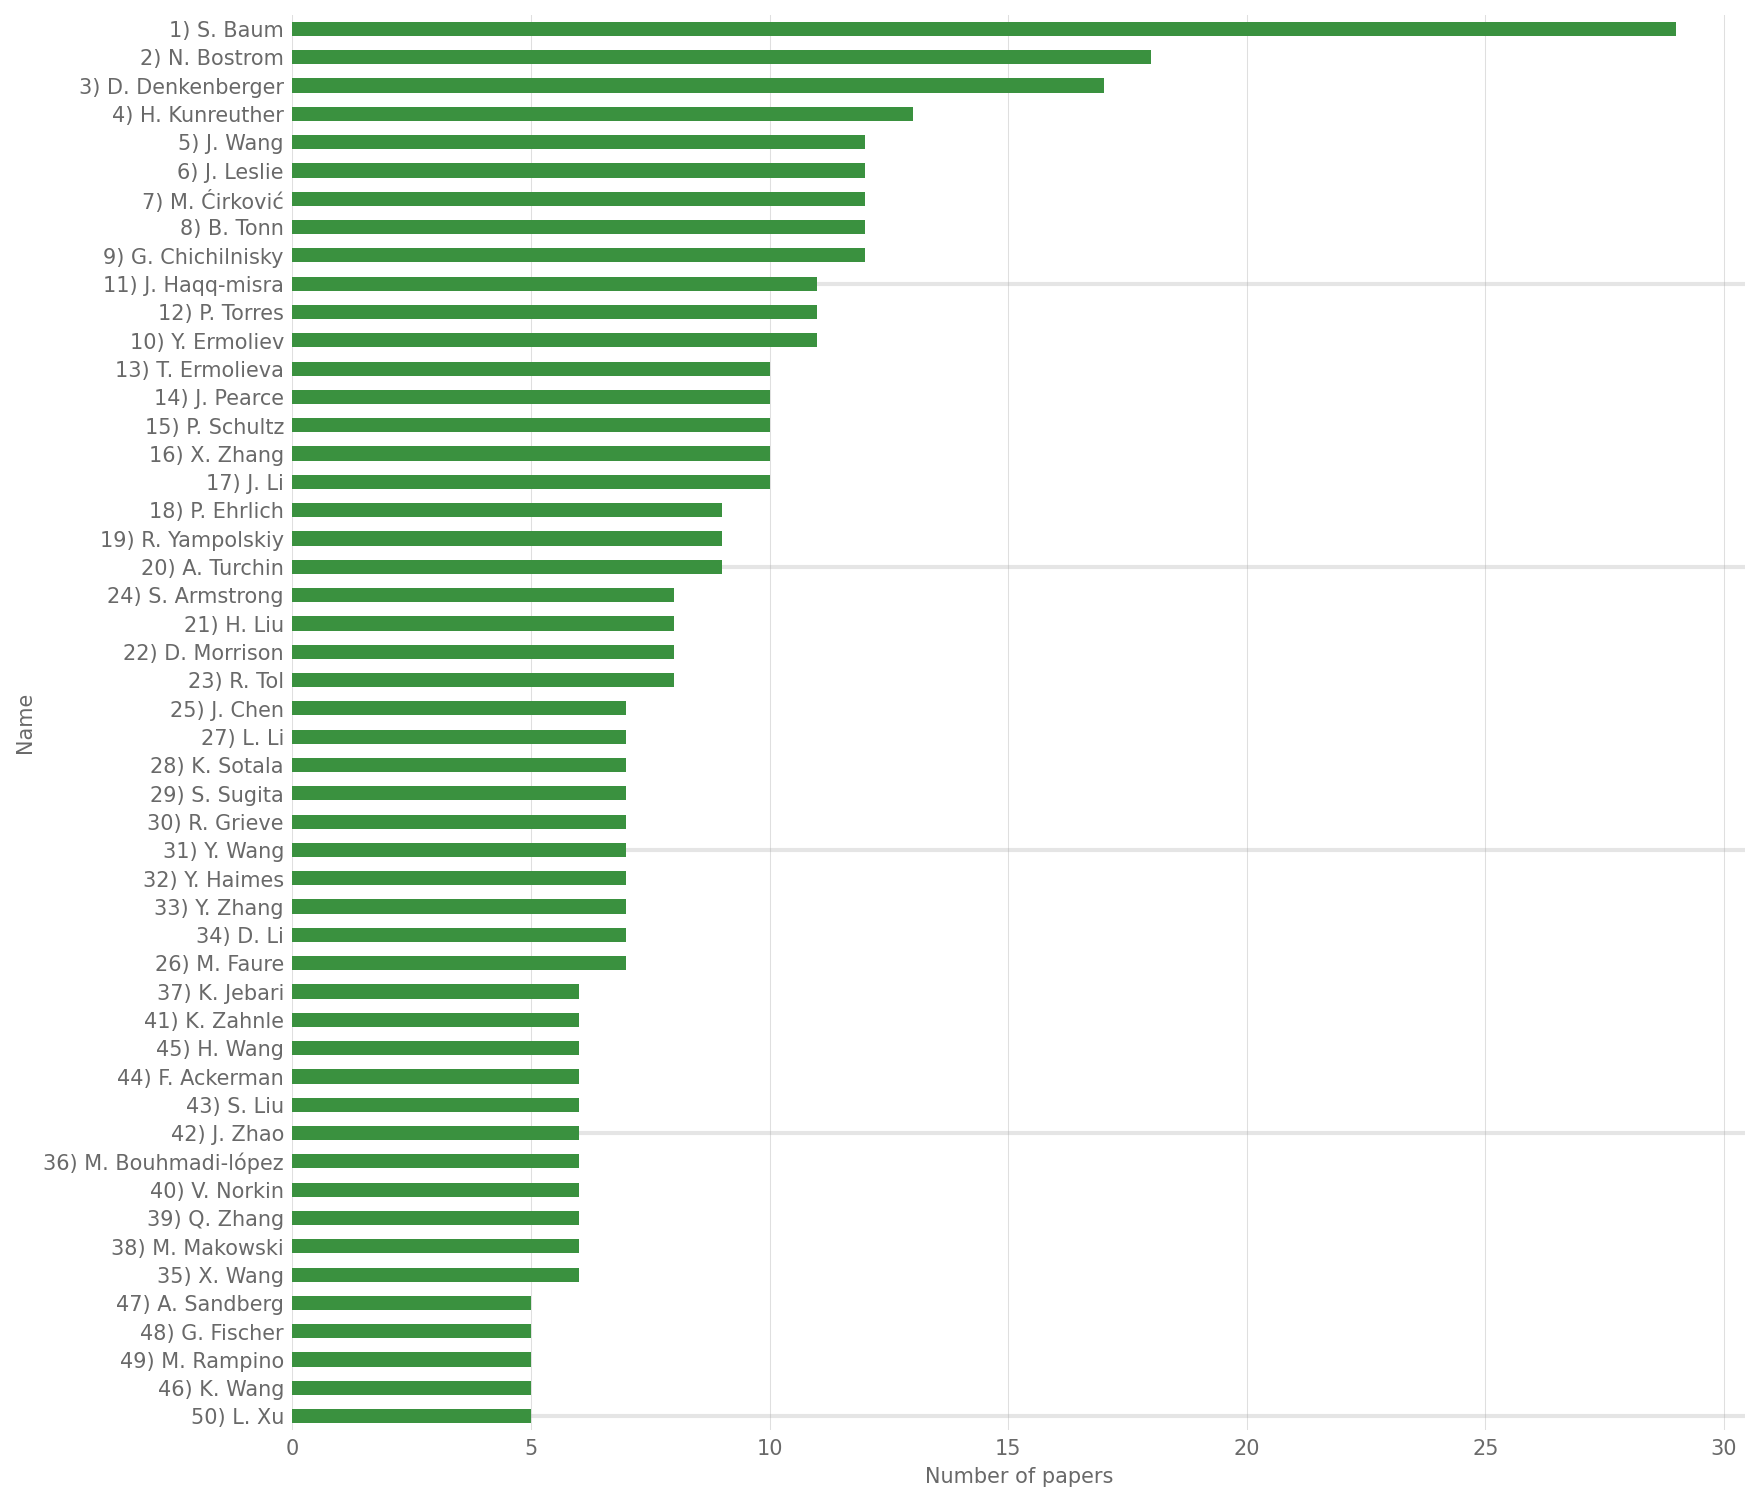

In [53]:
# Use the ALLFED style
import matplotlib.pyplot as plt
plt.style.use("https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle")

# Plot the first x names
x = 50
ax = count_df.iloc[0:x,:].sort_values('Count', ascending=True).plot(kind='barh', x='Name', y='Count', figsize=(x/4, x/4), legend=False)
ax.yaxis.grid(False)
ax.set_xlabel("Number of papers")
# Add a vertical line for every 10th name
for i in range(0, x, 10):
    ax.axhline(i, color='black', alpha=0.1, zorder=0)
plt.savefig("author_count.png", dpi=300, bbox_inches='tight')